# Курсовая работа
# Выполнила Шубина Мария БФИ2202

In [ ]:
class Node:
    def __init__(self, value):
        self.value = value
        self.next = None
        self.previous = None

# Реализация дека через двусвязный список
class Deque:
    def __init__(self, *args):
        self.size = 0
        self.head = None
        self.end = None
        for x in args:
            self.pushBack(x)
            self.size += 1

    def isEmpty(self):
        return self.head is None

    def pushBack(self, value):
        self.size += 1
        tmp = Node(value)
        if self.isEmpty():
            self.head = tmp
            self.end = tmp
        else:
            self.end.next = tmp
            tmp.previous = self.end
            self.end = tmp

    def pushTop(self, value):
        self.size += 1
        tmp = Node(value)
        if self.isEmpty():
            self.head = tmp
            self.end = tmp
        else:
            self.head.previous = tmp
            tmp.next = self.head
            self.head = tmp

    def popTop(self, readOnly=False):
        if self.isEmpty():
            return None
        if readOnly:
            return self.head.value
        self.size -= 1
        tmp = self.head.value
        if self.size == 0:
            self.head = None
            self.end = None
            return tmp
        self.head = self.head.next
        if self.head is not None:
            self.head.previous = None
        return tmp

    def popBack(self, readOnly=False):
        if self.isEmpty():
            return None
        if readOnly:
            return self.end.value
        self.size -= 1
        tmp = self.end.value
        if self.size == 0:
            self.head = None
            self.end = None
            return tmp
        self.end = self.end.previous
        if self.end is not None:
            self.end.next = None
        return tmp

    def __repr__(self):
        line = '<'
        pointer = self.head
        for _ in range(self.size):
            line += str(pointer.value)
            pointer = pointer.next
            line += " ; "
        line += '>'
        return line

In [ ]:
# Хэш-таблица с использованием метода цепочек для рехеширования
class Hash:

    def __init__(self, size):
        self.size = size
        self.keys = [None for _ in range(self.size)]
        self.values = [None for _ in range(self.size)]
        self.hashFunc = lambda key: (sum([ord(x) for x in key]) + len(key)) % self.size

    def put(self, key, value):
        hashkey = self.hashFunc(key)
        if self.keys[hashkey] is None:
            self.keys[hashkey] = Deque()
            self.values[hashkey] = Deque()
            self.keys[hashkey].pushBack(key)
            self.values[hashkey].pushBack(value)
        else:
            pointer_k = self.keys[hashkey].head
            pointer_v = self.values[hashkey].head
            flag = True
            while pointer_k is not None:
                if pointer_k.value == key:
                    pointer_v.value = value
                    flag = False
                    break
                else:
                    pointer_k = pointer_k.next
                    pointer_v = pointer_v.next
            if flag:
                self.keys[hashkey].pushBack(key)
                self.values[hashkey].pushBack(value)


    def get(self, key):
        hashkey = self.hashFunc(key)
        if self.keys[hashkey] is None:
            return None
        ptr_k = self.keys[hashkey].head
        ptr_v = self.values[hashkey].head
        for i in range (self.keys[hashkey].size):
            if ptr_k.value == key:
                return ptr_v.value
            ptr_k = ptr_k.next
            ptr_v = ptr_v.next
        return None

    def get_all_labels(self):
        res = []
        for x in self.keys:
            if x is not None:
                pointer = x.head
                while pointer is not None:
                    res.append(pointer.value)
                    pointer = pointer.next
        return res


## Загрузка данных из CSV

In [ ]:
import csv

csv_ord = {}
hashtable = Hash(256)
# Открытие CSV файла
with open('order.csv', 'r') as file:
    reader = csv.DictReader(file, delimiter=';')
    i = 0
    for row in reader:
        i += 1
        # обработка ошибки неполных данных
        if None in row.values():
            print("Ошибка данных в строке", i)
            continue
        # обработка ошибок, связанных с числовыми типами данных
        if not row['sells'].isdigit():
            print(f"Ошибка в данных о продажах в строке {i}: это не число.")
            continue
        if not row['price'].isdigit():
            print(f"Ошибка в данных о цене в строке {i}: это не число.")
            continue
        if not row['cost'].isdigit():
            print(f"Ошибка в данных о стоимости в строке {i}: это не число.")
            continue
        csv_ord[row['id']] = {'name': row['name'], 'date': row['date'], 'category': row['category'],
                              'sells': int(row['sells']), 'price': int(row['price']), 'cost': int(row['cost'])}
        # Если товара нет в таблице - он туда просто добавляются
        # Иначе к старым значениям продаж и выручки прибавляются данные из нового заказа
        if hashtable.get(row['name']) is None:
            hashtable.put(row['name'], {'category': row['category'],
                                        'sells': int(row['sells']), 'price': int(row['price']), 'cost': int(row['cost'])})
        else:
            tmp = hashtable.get(row['name'],)
            hashtable.put(row['name'], {'category': row['category'], 'sells': tmp['sells'] + int(row['sells']),
                                        'price': tmp['price'], 'cost': int(row['cost']) + tmp['cost']})

print(csv_ord)
sold_labels = hashtable.get_all_labels() # получение списка всех товаров, проданных в магазине
print(sold_labels)

Ошибка данных в строке 16
{'1': {'name': 'Батон', 'date': '20.05.2024', 'category': 'Хлебобулочные изделия', 'sells': 1, 'price': 59, 'cost': 59}, '2': {'name': 'Помидоры', 'date': '20.05.2024', 'category': 'Овощи и фрукты', 'sells': 3, 'price': 350, 'cost': 1050}, '3': {'name': 'Куриная грудка', 'date': '20.05.2024', 'category': 'Рыба и мясо', 'sells': 2, 'price': 539, 'cost': 988}, '4': {'name': 'Зубная паста', 'date': '20.05.2024', 'category': 'Бытовые товары', 'sells': 1, 'price': 229, 'cost': 229}, '5': {'name': 'Бананы', 'date': '20.05.2024', 'category': 'Овощи и фрукты', 'sells': 2, 'price': 209, 'cost': 418}, '6': {'name': 'Шоколадка', 'date': '21.05.2024', 'category': 'Сладкое', 'sells': 4, 'price': 195, 'cost': 750}, '7': {'name': 'Яйца', 'date': '21.05.2024', 'category': 'Бакалея', 'sells': 1, 'price': 156, 'cost': 156}, '8': {'name': 'Чипсы', 'date': '21.05.2024', 'category': 'Снеки', 'sells': 3, 'price': 165, 'cost': 495}, '9': {'name': 'Сосиски', 'date': '22.05.2024', 'ca

## Общая выручка магазина

In [ ]:
def income_count():
    sum = 0
    for x in sold_labels:
        sum += hashtable.get(x)['cost']
    return sum

print(income_count())

23413


## Товар с самыми большими продажами

In [ ]:
def max_count():
    res = sold_labels[0]
    for x in sold_labels[1:]:
        if hashtable.get(x)['sells'] > hashtable.get(res)['sells']:
            res = x
    return {res: hashtable.get(res)}

print(max_count())

{'Банка кофе': {'category': 'Бакалея', 'sells': 9, 'price': 296, 'cost': 2595}}


## Товар с самой большой доходностью

In [ ]:
def max_income():
    res = sold_labels[0]
    for x in sold_labels[1:]:
        if hashtable.get(x)['cost'] > hashtable.get(res)['cost']:
            res = x
    return {res: hashtable.get(res)}

print(max_income())

{'Куриная грудка': {'category': 'Рыба и мясо', 'sells': 6, 'price': 539, 'cost': 2964}}


## Составление отчёта о работе магазина

Перед выводом графика самых продаваемых товаров, товары сортируются по количеству продаж с помощью сортировки вставками

In [ ]:
from copy import deepcopy

def labeled_insertion_sort(lb, ar):
    label = deepcopy(lb)
    array = deepcopy(ar)
    for i in range(1, len(array)):
        insert_item = array[i]
        insert_label = label[i]
        j = i - 1
        while j >= 0 and array[j] > insert_item:
            array[j + 1] = array[j]
            label[j + 1] = label[j]
            j -= 1
        array[j + 1] = insert_item
        label[j + 1] = insert_label
    return label, array


Отчёт о товарах магазина.
Общая выручка магазина: 23413

Товар "Батон" был продан 1 раз. Его продажи составили 0% от выручки.
Товар "Банка кофе" был продан 9 раз. Его продажи составили 11% от выручки.
Товар "Лапша" был продан 9 раз. Его продажи составили 3% от выручки.
Товар "Пирог" был продан 2 раз. Его продажи составили 4% от выручки.
Товар "Кефир" был продан 1 раз. Его продажи составили 0% от выручки.
Товар "Куриная грудка" был продан 6 раз. Его продажи составили 13% от выручки.
Товар "Орехи" был продан 1 раз. Его продажи составили 2% от выручки.
Товар "Пицца" был продан 3 раз. Его продажи составили 6% от выручки.
Товар "Чипсы" был продан 3 раз. Его продажи составили 2% от выручки.
Товар "Бананы" был продан 2 раз. Его продажи составили 2% от выручки.
Товар "Молоко" был продан 5 раз. Его продажи составили 2% от выручки.
Товар "Огурцы" был продан 6 раз. Его продажи составили 6% от выручки.
Товар "Лимонад" был продан 5 раз. Его продажи составили 3% от выручки.
Товар "Булочка" был прода

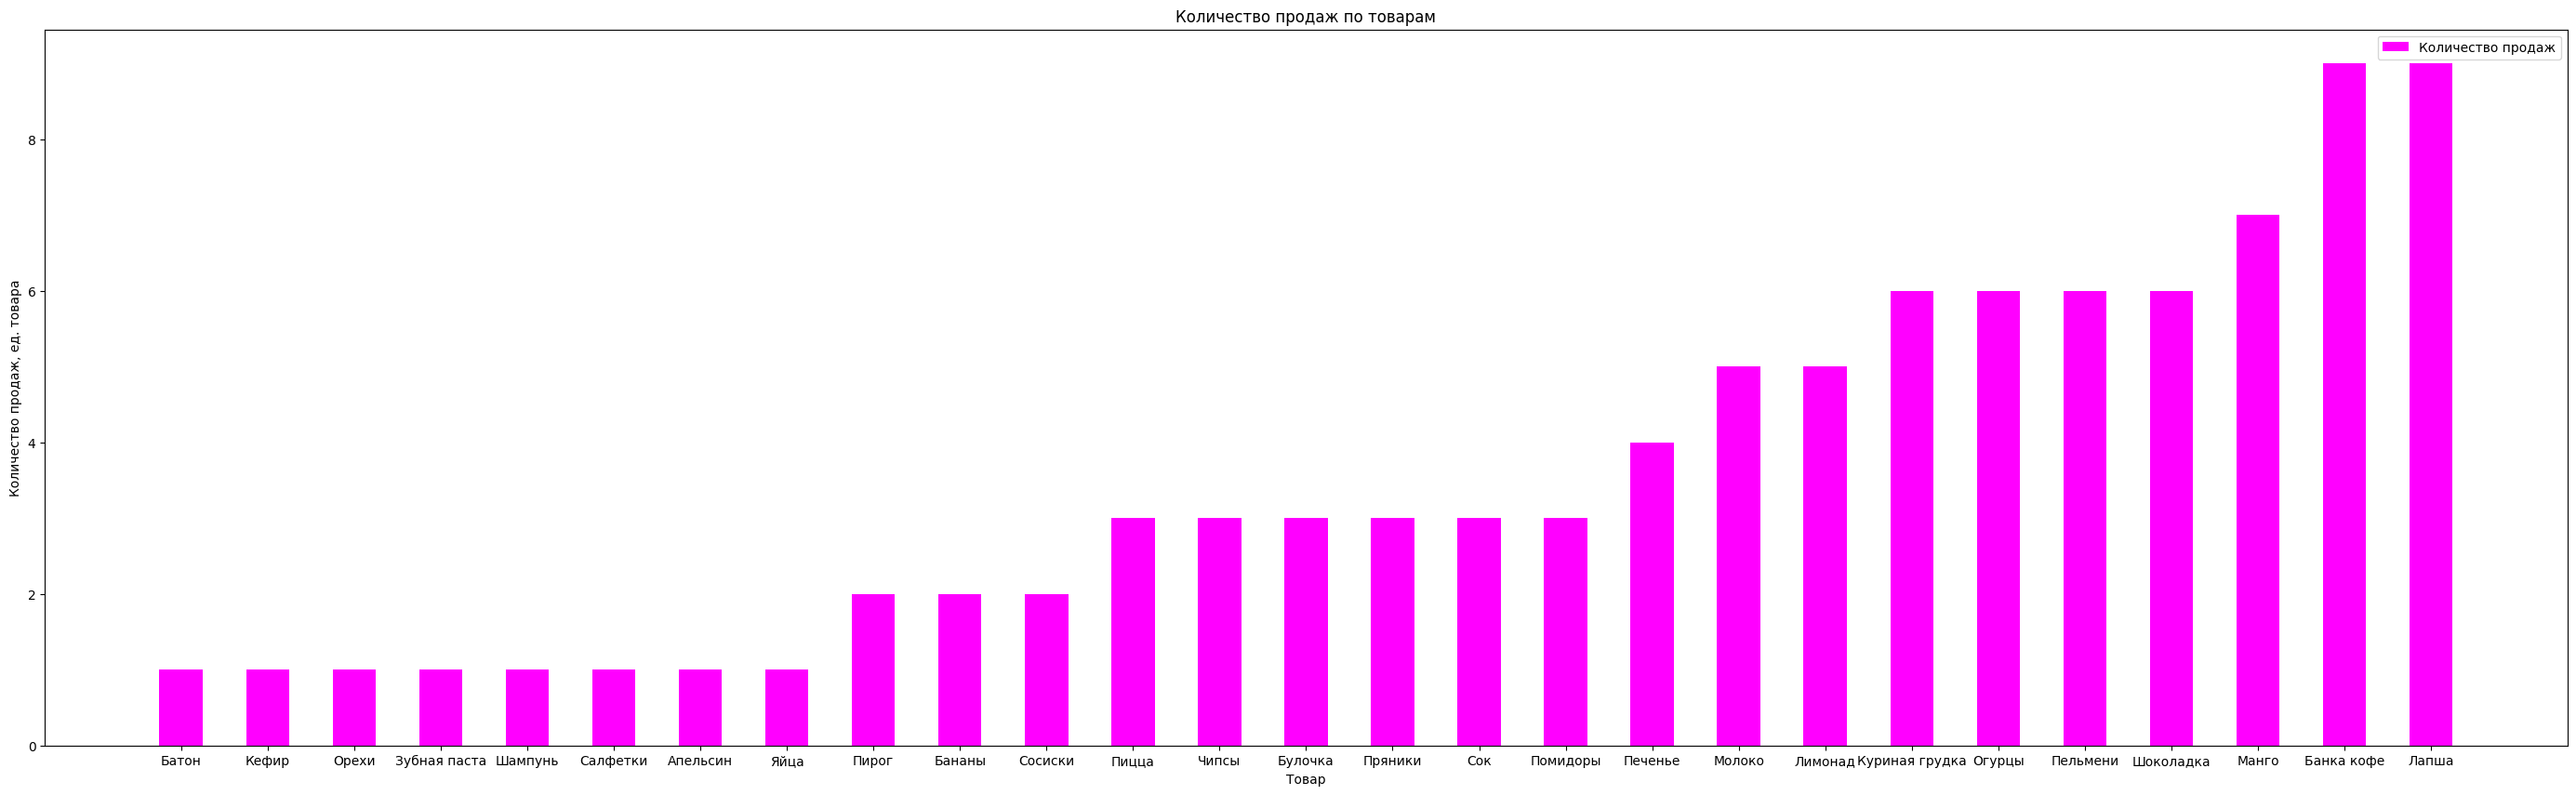

In [ ]:
import matplotlib.pyplot as plt

def report():
    income = income_count()
    print('Отчёт о товарах магазина.')
    print(f"Общая выручка магазина: {income}\n")
    x_label = []
    y_label = []
    for x in sold_labels:
        tmp = hashtable.get(x)
        part = round(tmp['cost'] / income * 100) # доля в выручке
        x_label += [x]
        y_label += [tmp['sells']]
        print(f"Товар \"{x}\" был продан {tmp['sells']} раз. Его продажи составили {part}% от выручки.")
    x_label, y_label = labeled_insertion_sort(x_label, y_label)
    fig= plt.figure(figsize=(35, 10))
    plt.bar(x_label, y_label, label="Количество продаж", color="fuchsia", width=0.5)
    plt.xlabel("Товар")
    plt.ylabel("Количество продаж, ед. товара")
    plt.title("Количество продаж по товарам")

    plt.legend()
    plt.show()


report()

In [1]:
import random

def date_parting(date):
    date = date.strip()
    if len(date.split('.')) == 3:
        ddate = date.split('.')
        if ddate[0].isdigit() and ddate[1].isdigit() and ddate[2].isdigit():
            idate = [int(x) for x in ddate]
            if (0 < idate[0] < 32 and idate[1] in (1, 3, 5, 7, 8, 10, 12)) or\
                (0 < idate[0] < 31 and idate[1] in (4, 6, 9, 11)) or\
                    (0 < idate[0] < 30 and idate[1] == 2):
                datehash = Hash(256)
                sum = 0
                for x in csv_ord:
                    if csv_ord[x]["date"] == date.strip():
                        if datehash.get(csv_ord[x]["name"]) is None:
                            datehash.put(csv_ord[x]["name"], csv_ord[x]["cost"])
                        else:
                            datehash.put(csv_ord[x]["name"], csv_ord[x]["cost"] + datehash.get(csv_ord[x]["name"]))
                        sum += csv_ord[x]["cost"]
                labels = datehash.get_all_labels()
                fig = plt.figure(figsize=(15, 7))
                plt.title("Выручка по товарам " + date)
                plt.pie([datehash.get(x) for x in labels], autopct=lambda x: round(x / 100 * sum), labels=labels,
                        explode=[random.uniform(0, 0.1) for x in range(len(labels))], shadow=True)
                plt.legend(labels, title="Товары", bbox_to_anchor=(0.1, 1 ), loc='upper right', borderaxespad=0)
                return
    print("Ошибка вводных данных!")
    return None

date_parting(input())

22.05.2024


NameError: name 'Hash' is not defined